# Template
- 1. EDA
- 2. 전처리
- 3. 데이터 분할
- 4. 학습
- 5. hyper-parameter tuning
- 6. 최종 테스트 

## Load Libraries & Data

In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.svm import SVR

### <Strong>들어가기 앞서</Strong> : <br>코스피는 거시경제학적인 측면에 기반한 지표들에 의해 지수의 등락이 결정된다고 판단하여 다양한 경제 지표들을 가져와서 Feature Engineering을 통하여 feature로 결정하여 사용

### 국내 증시 외 추가 data
 1. 국채
  - 미국채 3개월물
  - 미국채 2년물
  - 미국채 10년물
  - 한국채 10년물
 2. 원자재
  - 서부텍사스산 원유(wti)
  - 천연가스
  - 금
  - 은
  - 구리
 3. 환율
  - 달러 인덱스
  - 원/달러
  - 엔/달러
  - 위안/달러
 4. 지수
  - 다우
  - S&p 500
  - 나스닥
  - 항셍 (홍콩)
  - 중국 종합 지수 (심천 + 상해)
  - 상해 지수

## Data 추가

In [153]:
# read train csv
train_path = 'data/train/'
kospi_train = pd.read_csv(train_path + 'kospi_train.csv') # kospi
celltrion_train = pd.read_csv(train_path + 'celltrion_train.csv') # celltrion
kakao_train = pd.read_csv(train_path + 'kakao_train.csv') # kakao
naver_train = pd.read_csv(train_path + 'naver_train.csv') # naver
samsung_train = pd.read_csv(train_path + 'samsung_train.csv') # samsung
skhynix_train = pd.read_csv(train_path + 'skhynix_train.csv') # skhynix
us_3MT_train = pd.read_csv(train_path + 'us_3MT_train.csv') # 미국채 3개월 금리
us_2YT_train  = pd.read_csv(train_path + 'us_2YT_train.csv') # 미국채 2년 금리
us_10YT_train = pd.read_csv(train_path + 'us_10YT_train.csv') # 미국채 10년 금리
kr_10YT_train = pd.read_csv(train_path + 'kr_10YT_train.csv') # 한국채 10년 금리
wti_train = pd.read_csv(train_path + 'wti_train.csv') # wti 유가 선물
gas_train = pd.read_csv(train_path + 'gas_train.csv') # 천연 가스 선물
gold_train = pd.read_csv(train_path + 'gold_train.csv') # 금 선물
silver_train = pd.read_csv(train_path + 'silver_train.csv') # 은 선물
copper_train = pd.read_csv(train_path + 'copper_train.csv') # 구리 선물
usd_index_train = pd.read_csv(train_path + 'usd_index_train.csv') # 달러 지수 선물
usd_krw_train = pd.read_csv(train_path + 'usd_krw_train.csv') # 달러/원화 환율
usd_jpy_train = pd.read_csv(train_path + 'usd_jpy_train.csv') # 달러/엔화 환율
usd_cny_train = pd.read_csv(train_path + 'usd_cny_train.csv') # 달러/위안화 환율
dow_train = pd.read_csv(train_path + 'dow_train.csv') # 다우 존스 지수
snp_train = pd.read_csv(train_path + 'snp_train.csv') # snp 500 지수
nasdaq_train = pd.read_csv(train_path + 'nasdaq_train.csv') # nasdaq 지수
hk_train = pd.read_csv(train_path + 'hk_train.csv') # 항셍 지수
csi_train = pd.read_csv(train_path + 'csi_train.csv') # csi300 지수
sanghai_train = pd.read_csv(train_path + 'sanghai_train.csv') # sanghai300 지수

In [154]:
# read test csv
test_path = 'data/test/'
kospi_test = pd.read_csv(test_path + 'kospi_test.csv') # kospi
celltrion_test = pd.read_csv(test_path + 'celltrion_test.csv') # celltrion
kakao_test = pd.read_csv(test_path + 'kakao_test.csv') # kakao
naver_test = pd.read_csv(test_path + 'naver_test.csv') # naver
samsung_test = pd.read_csv(test_path + 'samsung_test.csv') # samsung
skhynix_test = pd.read_csv(test_path + 'skhynix_test.csv') # skhynix
us_3MT_test = pd.read_csv(test_path + 'us_3MT_test.csv') # 미국채 3개월 금리
us_2YT_test  = pd.read_csv(test_path + 'us_2YT_test.csv') # 미국채 2년 금리
us_10YT_test = pd.read_csv(test_path + 'us_10YT_test.csv') # 미국채 10년 금리
kr_10YT_test = pd.read_csv(test_path + 'kr_10YT_test.csv') # 한국채 10년 금리
wti_test = pd.read_csv(test_path + 'wti_test.csv') # wti 유가 선물
gas_test = pd.read_csv(test_path + 'gas_test.csv') # 천연 가스 선물
gold_test = pd.read_csv(test_path + 'gold_test.csv') # 금 선물
silver_test = pd.read_csv(test_path + 'silver_test.csv') # 은 선물
copper_test = pd.read_csv(test_path + 'copper_test.csv') # 구리 선물
usd_index_test = pd.read_csv(test_path + 'usd_index_test.csv') # 달러 지수 선물
usd_krw_test = pd.read_csv(test_path + 'usd_krw_test.csv') # 달러/원화 환율
usd_jpy_test = pd.read_csv(test_path + 'usd_jpy_test.csv') # 달러/엔화 환율
usd_cny_test = pd.read_csv(test_path + 'usd_cny_test.csv') # 달러/위안화 환율
dow_test = pd.read_csv(test_path + 'dow_test.csv') # 다우 존스 지수
snp_test = pd.read_csv(test_path + 'snp_test.csv') # snp 500 지수
nasdaq_test = pd.read_csv(test_path + 'nasdaq_test.csv') # nasdaq 지수
hk_test = pd.read_csv(test_path + 'hk_test.csv') # 항셍 지수
csi_test = pd.read_csv(test_path + 'csi_test.csv') # csi300 지수
sanghai_test = pd.read_csv(test_path + 'sanghai_test.csv') # sanghai300 지수

### 예측을 위해 Target Value index 조정
- Target Value로 지정할 Close column은 하루 뒤 예측을 위해 Close column만 하루씩 앞당겨 train data에 학습

In [155]:
# target value date adjust
for i in range(len(kospi_train.Close)-1):
    kospi_train.Close[i] = kospi_train.Close[i+1]
kospi_train.drop(kospi_train[-1:].index,inplace=True)

# for i in range(len(kospi_test.Close)-1):
#     kospi_test.Close[i] = kospi_test.Close[i+1]
# kospi_test.drop(kospi_test[-1:].index,inplace=True)

/var/folders/l3/r5rtf2n15dv3t45j0t5m9s0m0000gn/T/ipykernel_8386/4137830753.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kospi_train.Close[i] = kospi_train.Close[i+1]


### 시계열 데이터 index를 Datetime 형으로 변환 후 입력

In [156]:
# change type of 'Date' to 'datetime'
kospi_train.Date = pd.to_datetime(kospi_train.Date)
celltrion_train.Date = pd.to_datetime(celltrion_train.Date)
kakao_train.Date = pd.to_datetime(kakao_train.Date)
naver_train.Date = pd.to_datetime(naver_train.Date)
samsung_train.Date = pd.to_datetime(samsung_train.Date)
skhynix_train.Date = pd.to_datetime(skhynix_train.Date)
us_3MT_train.Date = pd.to_datetime(us_3MT_train.Date)
us_2YT_train .Date = pd.to_datetime(us_2YT_train .Date)
us_10YT_train.Date = pd.to_datetime(us_10YT_train.Date)
kr_10YT_train.Date = pd.to_datetime(kr_10YT_train.Date)
wti_train.Date = pd.to_datetime(wti_train.Date)
gas_train.Date = pd.to_datetime(gas_train.Date)
gold_train.Date = pd.to_datetime(gold_train.Date)
silver_train.Date = pd.to_datetime(silver_train.Date)
copper_train.Date = pd.to_datetime(copper_train.Date)
usd_index_train.Date = pd.to_datetime(usd_index_train.Date)
usd_krw_train.Date = pd.to_datetime(usd_krw_train.Date)
usd_jpy_train.Date = pd.to_datetime(usd_jpy_train.Date)
usd_cny_train.Date = pd.to_datetime(usd_cny_train.Date)
dow_train.Date = pd.to_datetime(dow_train.Date)
snp_train.Date = pd.to_datetime(snp_train.Date)
nasdaq_train.Date = pd.to_datetime(nasdaq_train.Date)
hk_train.Date = pd.to_datetime(hk_train.Date)
csi_train.Date = pd.to_datetime(csi_train.Date)
sanghai_train.Date = pd.to_datetime(sanghai_train.Date)
kospi_test.Date = pd.to_datetime(kospi_test.Date)
celltrion_test.Date = pd.to_datetime(celltrion_test.Date)
kakao_test.Date = pd.to_datetime(kakao_test.Date)
naver_test.Date = pd.to_datetime(naver_test.Date)
samsung_test.Date = pd.to_datetime(samsung_test.Date)
skhynix_test.Date = pd.to_datetime(skhynix_test.Date)
us_3MT_test.Date = pd.to_datetime(us_3MT_test.Date)
us_2YT_test .Date = pd.to_datetime(us_2YT_test .Date)
us_10YT_test.Date = pd.to_datetime(us_10YT_test.Date)
kr_10YT_test.Date = pd.to_datetime(kr_10YT_test.Date)
wti_test.Date = pd.to_datetime(wti_test.Date)
gas_test.Date = pd.to_datetime(gas_test.Date)
gold_test.Date = pd.to_datetime(gold_test.Date)
silver_test.Date = pd.to_datetime(silver_test.Date)
copper_test.Date = pd.to_datetime(copper_test.Date)
usd_index_test.Date = pd.to_datetime(usd_index_test.Date)
usd_krw_test.Date = pd.to_datetime(usd_krw_test.Date)
usd_jpy_test.Date = pd.to_datetime(usd_jpy_test.Date)
usd_cny_test.Date = pd.to_datetime(usd_cny_test.Date)
dow_test.Date = pd.to_datetime(dow_test.Date)
snp_test.Date = pd.to_datetime(snp_test.Date)
nasdaq_test.Date = pd.to_datetime(nasdaq_test.Date)
hk_test.Date = pd.to_datetime(hk_test.Date)
csi_test.Date = pd.to_datetime(csi_test.Date)
sanghai_test.Date = pd.to_datetime(sanghai_test.Date)

In [157]:
# index adjust
kospi_train.index = pd.to_datetime(kospi_train.Date)
celltrion_train.index = pd.to_datetime(celltrion_train.Date)
kakao_train.index = pd.to_datetime(kakao_train.Date)
naver_train.index = pd.to_datetime(naver_train.Date)
samsung_train.index = pd.to_datetime(samsung_train.Date)
skhynix_train.index = pd.to_datetime(skhynix_train.Date)
us_3MT_train.index = pd.to_datetime(us_3MT_train.Date)
us_2YT_train .index = pd.to_datetime(us_2YT_train .Date)
us_10YT_train.index = pd.to_datetime(us_10YT_train.Date)
kr_10YT_train.index = pd.to_datetime(kr_10YT_train.Date)
wti_train.index = pd.to_datetime(wti_train.Date)
gas_train.index = pd.to_datetime(gas_train.Date)
gold_train.index = pd.to_datetime(gold_train.Date)
silver_train.index = pd.to_datetime(silver_train.Date)
copper_train.index = pd.to_datetime(copper_train.Date)
usd_index_train.index = pd.to_datetime(usd_index_train.Date)
usd_krw_train.index = pd.to_datetime(usd_krw_train.Date)
usd_jpy_train.index = pd.to_datetime(usd_jpy_train.Date)
usd_cny_train.index = pd.to_datetime(usd_cny_train.Date)
dow_train.index = pd.to_datetime(dow_train.Date)
snp_train.index = pd.to_datetime(snp_train.Date)
nasdaq_train.index = pd.to_datetime(nasdaq_train.Date)
hk_train.index = pd.to_datetime(hk_train.Date)
csi_train.index = pd.to_datetime(csi_train.Date)
sanghai_train.index = pd.to_datetime(sanghai_train.Date)
kospi_test.index = pd.to_datetime(kospi_test.Date)
celltrion_test.index = pd.to_datetime(celltrion_test.Date)
kakao_test.index = pd.to_datetime(kakao_test.Date)
naver_test.index = pd.to_datetime(naver_test.Date)
samsung_test.index = pd.to_datetime(samsung_test.Date)
skhynix_test.index = pd.to_datetime(skhynix_test.Date)
us_3MT_test.index = pd.to_datetime(us_3MT_test.Date)
us_2YT_test .index = pd.to_datetime(us_2YT_test .Date)
us_10YT_test.index = pd.to_datetime(us_10YT_test.Date)
kr_10YT_test.index = pd.to_datetime(kr_10YT_test.Date)
wti_test.index = pd.to_datetime(wti_test.Date)
gas_test.index = pd.to_datetime(gas_test.Date)
gold_test.index = pd.to_datetime(gold_test.Date)
silver_test.index = pd.to_datetime(silver_test.Date)
copper_test.index = pd.to_datetime(copper_test.Date)
usd_index_test.index = pd.to_datetime(usd_index_test.Date)
usd_krw_test.index = pd.to_datetime(usd_krw_test.Date)
usd_jpy_test.index = pd.to_datetime(usd_jpy_test.Date)
usd_cny_test.index = pd.to_datetime(usd_cny_test.Date)
dow_test.index = pd.to_datetime(dow_test.Date)
snp_test.index = pd.to_datetime(snp_test.Date)
nasdaq_test.index = pd.to_datetime(nasdaq_test.Date)
hk_test.index = pd.to_datetime(hk_test.Date)
csi_test.index = pd.to_datetime(csi_test.Date)
sanghai_test.index = pd.to_datetime(sanghai_test.Date)

In [158]:
# drop 'Date' column
kospi_train = kospi_train.drop(columns='Date')
celltrion_train = celltrion_train.drop(columns='Date')
kakao_train = kakao_train.drop(columns='Date')
naver_train = naver_train.drop(columns='Date')
samsung_train = samsung_train.drop(columns='Date')
skhynix_train = skhynix_train.drop(columns='Date')
us_3MT_train = us_3MT_train.drop(columns='Date')
us_2YT_train  = us_2YT_train .drop(columns='Date')
us_10YT_train = us_10YT_train.drop(columns='Date')
kr_10YT_train = kr_10YT_train.drop(columns='Date')
wti_train = wti_train.drop(columns='Date')
gas_train = gas_train.drop(columns='Date')
gold_train = gold_train.drop(columns='Date')
silver_train = silver_train.drop(columns='Date')
copper_train = copper_train.drop(columns='Date')
usd_index_train = usd_index_train.drop(columns='Date')
usd_krw_train = usd_krw_train.drop(columns='Date')
usd_jpy_train = usd_jpy_train.drop(columns='Date')
usd_cny_train = usd_cny_train.drop(columns='Date')
dow_train = dow_train.drop(columns='Date')
snp_train = snp_train.drop(columns='Date')
nasdaq_train = nasdaq_train.drop(columns='Date')
hk_train = hk_train.drop(columns='Date')
csi_train = csi_train.drop(columns='Date')
sanghai_train = sanghai_train.drop(columns='Date')
kospi_test = kospi_test.drop(columns='Date')
celltrion_test = celltrion_test.drop(columns='Date')
kakao_test = kakao_test.drop(columns='Date')
naver_test = naver_test.drop(columns='Date')
samsung_test = samsung_test.drop(columns='Date')
skhynix_test = skhynix_test.drop(columns='Date')
us_3MT_test = us_3MT_test.drop(columns='Date')
us_2YT_test  = us_2YT_test .drop(columns='Date')
us_10YT_test = us_10YT_test.drop(columns='Date')
kr_10YT_test = kr_10YT_test.drop(columns='Date')
wti_test = wti_test.drop(columns='Date')
gas_test = gas_test.drop(columns='Date')
gold_test = gold_test.drop(columns='Date')
silver_test = silver_test.drop(columns='Date')
copper_test = copper_test.drop(columns='Date')
usd_index_test = usd_index_test.drop(columns='Date')
usd_krw_test = usd_krw_test.drop(columns='Date')
usd_jpy_test = usd_jpy_test.drop(columns='Date')
usd_cny_test = usd_cny_test.drop(columns='Date')
dow_test = dow_test.drop(columns='Date')
snp_test = snp_test.drop(columns='Date')
nasdaq_test = nasdaq_test.drop(columns='Date')
hk_test = hk_test.drop(columns='Date')
csi_test = csi_test.drop(columns='Date')
sanghai_test = sanghai_test.drop(columns='Date')

### 각 데이터 묶음 별 흐름의 시각화

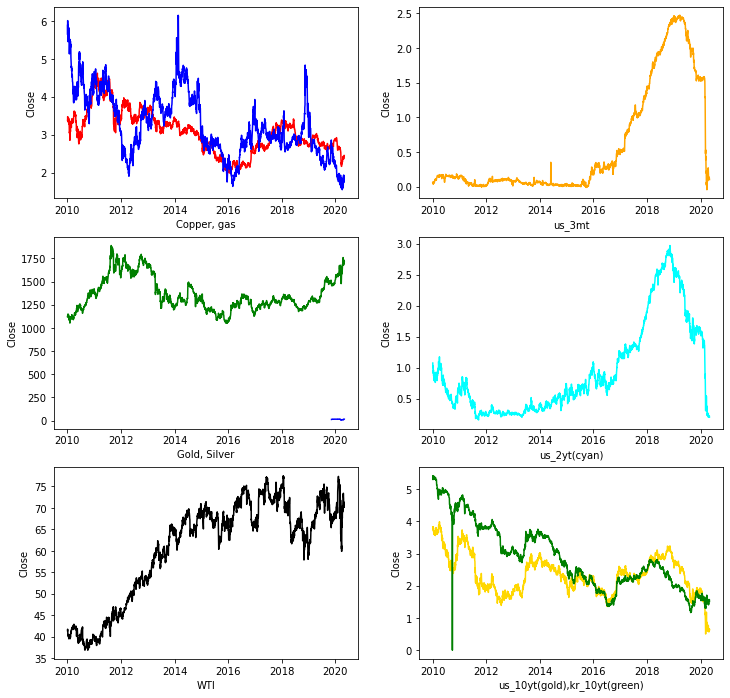

In [159]:
# 원자재 및 국채 금리 시각화
plt.figure(figsize=(12,12))
plt.subplot(321)
sns.lineplot(x=copper_train.index,y = copper_train['Close'], color='r')
sns.lineplot(x=gas_train.index,y = gas_train['Close'], color = 'b')
plt.xlabel('Copper, gas')
plt.subplot(323)
sns.lineplot(x=gold_train.index ,y = gold_train['Close'], color = 'g')
sns.lineplot(x=silver_train.index ,y = silver_train['Close'], color = 'b')
plt.xlabel('Gold, Silver')
plt.subplot(325)
sns.lineplot(x=wti_train.index,y = wti_train['Close'], color = 'black')
plt.xlabel('WTI')
plt.subplot(322)
sns.lineplot(x=us_3MT_train.index,y = us_3MT_train['Close'], color = 'orange')
plt.xlabel('us_3mt')
plt.subplot(324)
sns.lineplot(x=us_2YT_train.index,y = us_2YT_train['Close'], color = 'cyan')
plt.xlabel('us_2yt(cyan)')
plt.subplot(326)
sns.lineplot(x=us_10YT_train.index,y = us_10YT_train['Close'], color = 'gold')
sns.lineplot(x=kr_10YT_train.index,y = kr_10YT_train['Close'], color = 'green')
plt.xlabel('us_10yt(gold),kr_10yt(green)')
plt.show()

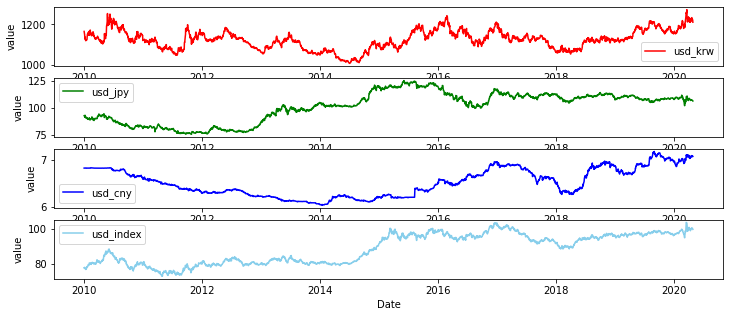

In [160]:
# 환율 (달러-원화/달러-엔화/달러-위안화/달러인덱스) 시각화
plt.figure(figsize=(12,5))
plt.subplot(411)
plt.ylabel('value')
sns.lineplot(x=usd_krw_train.index,y = usd_krw_train['Close'], color='r',label='usd_krw')
plt.subplot(412)
plt.ylabel('value')
sns.lineplot(x=usd_jpy_train.index,y = usd_jpy_train['Close'], color = 'g',label='usd_jpy')
plt.subplot(413)
plt.ylabel('value')
sns.lineplot(x=usd_cny_train.index,y = usd_cny_train['Close'], color = 'b',label='usd_cny')
plt.subplot(414)
plt.ylabel('value')
sns.lineplot(x=usd_index_train.index,y = usd_index_train['Close'], color = 'skyblue',label='usd_index')
plt.show()

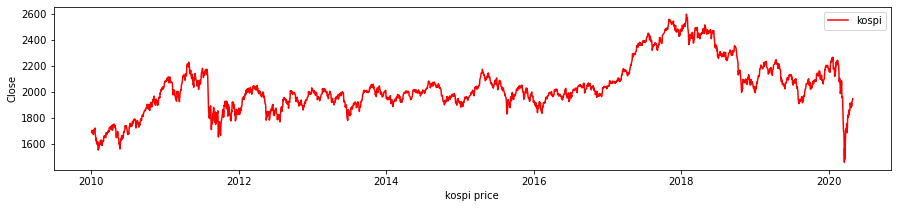

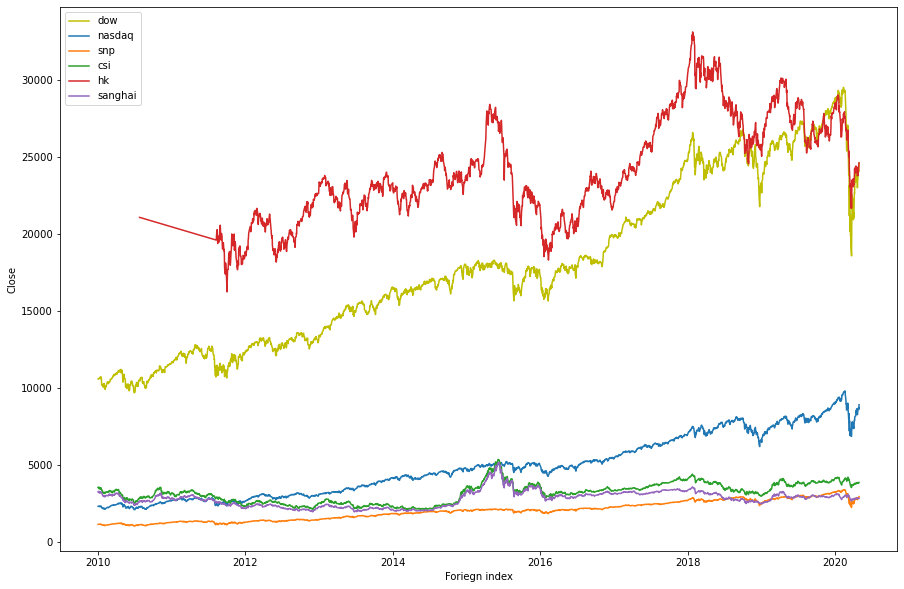

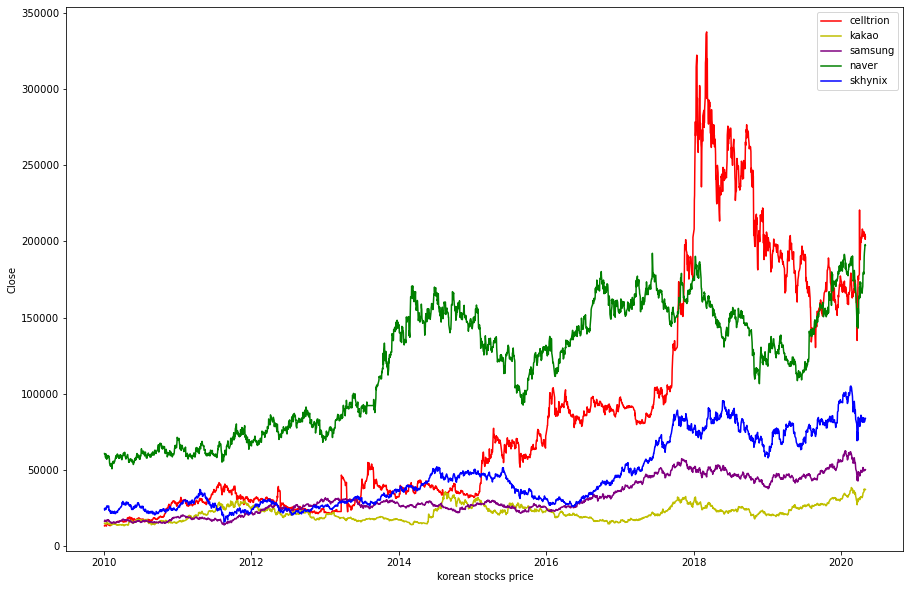

In [161]:
# 국내/해외 지수 및 기업 주가 시각화
plt.figure(figsize=(15,3))
plt.xlabel('kospi price')
sns.lineplot(x = kospi_train.index, y = kospi_train['Close'], color= 'r', label='kospi')
plt.show()
plt.figure(figsize=(15,10))
plt.xlabel('Foriegn index')
sns.lineplot(x = dow_train.index, y = dow_train['Close'], color = 'y',label='dow')
sns.lineplot(x = nasdaq_train.index, y = nasdaq_train['Close'], label='nasdaq')
sns.lineplot(x = snp_train.index, y = snp_train['Close'], label='snp')
sns.lineplot(x = csi_train.index, y = csi_train['Close'], label='csi')
sns.lineplot(x = hk_train.index, y = hk_train['Close'], label='hk')
sns.lineplot(x = sanghai_train.index, y = sanghai_train['Close'], label='sanghai')
plt.show()
plt.figure(figsize=(15,10))
plt.xlabel('korean stocks price')
sns.lineplot(x = celltrion_train.index, y = celltrion_train['Close'],color='r', label='celltrion')
sns.lineplot(x = kakao_train.index, y = kakao_train['Close'], color='y', label='kakao')
sns.lineplot(x = samsung_train.index, y = samsung_train['Close'],color='purple', label='samsung')
sns.lineplot(x = naver_train.index, y = naver_train['Close'], color='g', label='naver')
sns.lineplot(x = skhynix_train.index, y = skhynix_train['Close'],color='b', label='skhynix')
plt.show()

### 코스피를 기준으로 모든 데이터를 merge 후 상관관계 확인

In [162]:
# kospi_train merge
kospi_train_merged = pd.merge(kospi_train['Close'],dow_train.Close,left_index=True,right_index=True,how='left')
kospi_train_merged = pd.merge(kospi_train_merged,snp_train.Close,left_index=True,right_index=True,how='left')
kospi_train_merged = pd.merge(kospi_train_merged,samsung_train.Close,left_index=True,right_index=True,how='left')
kospi_train_merged = pd.merge(kospi_train_merged,kakao_train.Close,left_index=True,right_index=True,how='left')
kospi_train_merged = pd.merge(kospi_train_merged,naver_train.Close,left_index=True,right_index=True,how='left')
kospi_train_merged = pd.merge(kospi_train_merged,skhynix_train.Close,left_index=True,right_index=True,how='left')
kospi_train_merged = pd.merge(kospi_train_merged,celltrion_train.Close,left_index=True,right_index=True,how='left')
kospi_train_merged = pd.merge(kospi_train_merged,csi_train.Close,left_index=True,right_index=True,how='left')
kospi_train_merged = pd.merge(kospi_train_merged,sanghai_train.Close,left_index=True,right_index=True,how='left')
kospi_train_merged = pd.merge(kospi_train_merged,usd_krw_train.Close,left_index=True,right_index=True,how='left')
kospi_train_merged = pd.merge(kospi_train_merged,usd_index_train.Close,left_index=True,right_index=True,how='left')
kospi_train_merged = pd.merge(kospi_train_merged,usd_cny_train.Close,left_index=True,right_index=True,how='left')
kospi_train_merged = pd.merge(kospi_train_merged,usd_jpy_train.Close,left_index=True,right_index=True,how='left')
kospi_train_merged = pd.merge(kospi_train_merged,gold_train.Close,left_index=True,right_index=True,how='left')
kospi_train_merged = pd.merge(kospi_train_merged,wti_train.Close,left_index=True,right_index=True,how='left')
kospi_train_merged = pd.merge(kospi_train_merged,copper_train.Close,left_index=True,right_index=True,how='left')
kospi_train_merged = pd.merge(kospi_train_merged,gas_train.Close,left_index=True,right_index=True,how='left')
kospi_train_merged = pd.merge(kospi_train_merged,kr_10YT_train.Close,left_index=True,right_index=True,how='left')
kospi_train_merged = pd.merge(kospi_train_merged,us_3MT_train.Close,left_index=True,right_index=True,how='left')
kospi_train_merged = pd.merge(kospi_train_merged,us_10YT_train.Close,left_index=True,right_index=True,how='left')
kospi_train_merged.columns = ['Target','Dow','Snp','Samsung','Kakao','Naver','Skhynix','Celltrion','Csi','Sanghai','Usd_krw','Usd_index','Usd_cny','Usd_jpy','Gold','Wti','Copper','Gas','Kr_10YT','Us_3MT','Us_10YT']

/var/folders/l3/r5rtf2n15dv3t45j0t5m9s0m0000gn/T/ipykernel_8386/4199767425.py:4: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Close_x'} in the result is deprecated and will raise a MergeError in a future version.
  kospi_train_merged = pd.merge(kospi_train_merged,samsung_train.Close,left_index=True,right_index=True,how='left')
/var/folders/l3/r5rtf2n15dv3t45j0t5m9s0m0000gn/T/ipykernel_8386/4199767425.py:6: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Close_x'} in the result is deprecated and will raise a MergeError in a future version.
  kospi_train_merged = pd.merge(kospi_train_merged,naver_train.Close,left_index=True,right_index=True,how='left')
/var/folders/l3/r5rtf2n15dv3t45j0t5m9s0m0000gn/T/ipykernel_8386/4199767425.py:8: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Close_x'} in the result is deprecated and will raise a MergeError in a future version.
  kospi_train_merged = pd.merge(kospi_train_merged,celltrion_train.C

In [163]:
# merge 확인
kospi_train_merged.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2548 entries, 2010-01-04 to 2020-04-28
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Target     2548 non-null   float64
 1   Dow        2470 non-null   float64
 2   Snp        2470 non-null   float64
 3   Samsung    2547 non-null   float64
 4   Kakao      2547 non-null   float64
 5   Naver      2547 non-null   float64
 6   Skhynix    2547 non-null   float64
 7   Celltrion  2547 non-null   float64
 8   Csi        2426 non-null   float64
 9   Sanghai    2426 non-null   float64
 10  Usd_krw    2548 non-null   float64
 11  Usd_index  2531 non-null   float64
 12  Usd_cny    2548 non-null   float64
 13  Usd_jpy    2548 non-null   float64
 14  Gold       2419 non-null   float64
 15  Wti        2470 non-null   float64
 16  Copper     2408 non-null   float64
 17  Gas        2468 non-null   float64
 18  Kr_10YT    2547 non-null   float64
 19  Us_3MT     2530 non-null   flo

<AxesSubplot:>

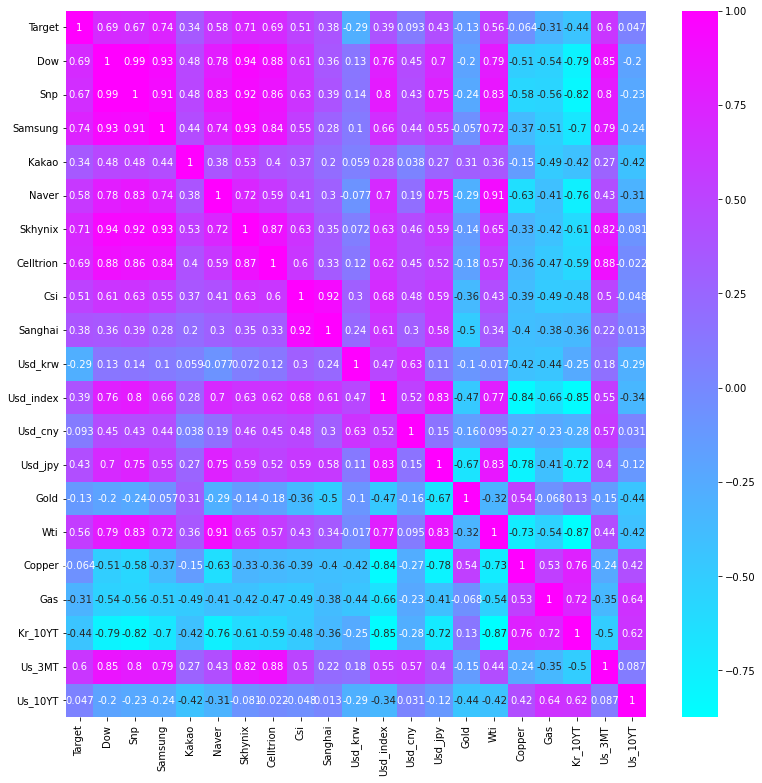

In [164]:
# Showing correlation of data
plt.figure(figsize=(13,13))
sns.heatmap(kospi_train_merged.corr(),annot=True, cmap='cool')

## EDA
### 각 지표 별 코스피와 관계 분석
 1. 국내 증시 : 국내 주식 중 kakao를 제외한 대부분의 주식들이 kospi와 상관계수가 높다.
  - 국내 증시는 다중 공선성 때문에 상관계수가 가장 높은 삼성과 상관계수가 상대적으로 낮은 kakao를 사용
 2. 국제 증시 지수 : 미국 증시(Dow/S&p 500), 중국 증시(Csi), 항셍 지수(Hk)와 kospi는 상관계수가 높다.
  - 미국 증시는 Dow만 사용하며 feature engineering에 유의하여 진행(다중 공선성 주의)하며 중국 증시(Csi)와 같이 사용
  - 항셍 지수는 코스피와 상관계수가 높으나 Null값이 481개로 사용하지 않음
 3. 원자재 : 금을 제외한 모든 원자재가 주가와 지수 간 양/음의 상관관계를 나타내고 있어 금을 제외한 모든 데이터를 사용
 4. 환율 : 원/달러의 음의 상관관계와 달러 인덱스의 상관 관계를 참고하여 사용
  - 원화 가치가 절하되었을 때 주가가 오를 확률이 높다는 가정을 하고 사용(달러 인덱스가 높으면 원화 가치가 낮을 확률이 높음)
 5. 국채 수익률: 미국채 3개월물과 한국채 10년물이 절대값으로 높은 상관관계를 가지고 있어 사용
 6. 기타 : 한국 국채 수익률 및 달러/원화 환율이 낮을 수록 코스피가 높아지는 경향을 볼 수가 있음

##### Feature engineering에 사용될 column : <br> <Strong> Samsung, Kakao, Dow, Csi, Wti, Gas, Copper, Usd_krw, Usd_index, Us_3MT, kr_10YT </Strong>

In [165]:
# 사용하지 않는 coulmn 제거
kospi_train_merged = kospi_train_merged.drop(columns=['Snp','Naver', 'Skhynix', 'Celltrion', 'Sanghai', 'Usd_cny', 'Usd_jpy', 'Gold', 'Us_10YT'])

# 데이터 전처리
## 결측치 처리
 - 지표는 대부분 단기/중기/장기적인 방향성을 가지고 있기 때문에 결측치의 전값과 다음값의 평균값을 대입

In [166]:
kospi_train_merged.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2548 entries, 2010-01-04 to 2020-04-28
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Target     2548 non-null   float64
 1   Dow        2470 non-null   float64
 2   Samsung    2547 non-null   float64
 3   Kakao      2547 non-null   float64
 4   Csi        2426 non-null   float64
 5   Usd_krw    2548 non-null   float64
 6   Usd_index  2531 non-null   float64
 7   Wti        2470 non-null   float64
 8   Copper     2408 non-null   float64
 9   Gas        2468 non-null   float64
 10  Kr_10YT    2547 non-null   float64
 11  Us_3MT     2530 non-null   float64
dtypes: float64(12)
memory usage: 323.3 KB


In [176]:
# 최근의 앞 뒤의 행의 값의 평균을 대입
kospi_train_merged = kospi_train_merged.fillna(kospi_train_merged.interpolate())
kospi_train_merged.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2548 entries, 2010-01-04 to 2020-04-28
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Target     2548 non-null   float64
 1   Dow        2548 non-null   float64
 2   Samsung    2548 non-null   float64
 3   Kakao      2548 non-null   float64
 4   Csi        2548 non-null   float64
 5   Usd_krw    2548 non-null   float64
 6   Usd_index  2548 non-null   float64
 7   Wti        2548 non-null   float64
 8   Copper     2548 non-null   float64
 9   Gas        2548 non-null   float64
 10  Kr_10YT    2548 non-null   float64
 11  Us_3MT     2548 non-null   float64
dtypes: float64(12)
memory usage: 323.3 KB


<AxesSubplot:>

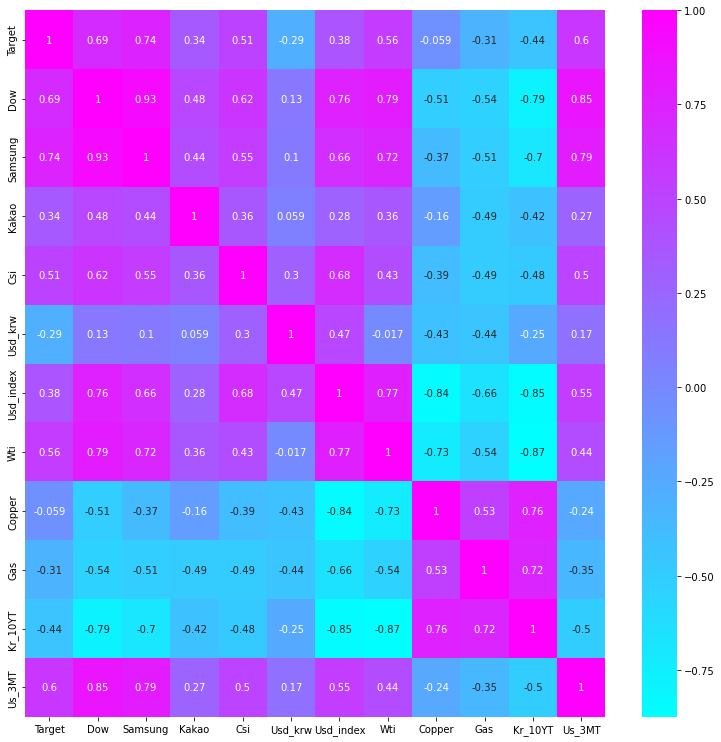

In [168]:
plt.figure(figsize=(13,13))
sns.heatmap(kospi_train_merged.corr(),annot=True, cmap='cool')

## Feature Engineering

In [179]:
# kospi_test merge
kospi_test_merged = pd.merge(kospi_test['Close'],dow_test.Close,left_index=True,right_index=True,how='left')
kospi_test_merged = pd.merge(kospi_test_merged,samsung_test.Close,left_index=True,right_index=True,how='left')
kospi_test_merged = pd.merge(kospi_test_merged,kakao_test.Close,left_index=True,right_index=True,how='left')
kospi_test_merged = pd.merge(kospi_test_merged,csi_test.Close,left_index=True,right_index=True,how='left')
kospi_test_merged = pd.merge(kospi_test_merged,usd_krw_test.Close,left_index=True,right_index=True,how='left')
kospi_test_merged = pd.merge(kospi_test_merged,usd_index_test.Close,left_index=True,right_index=True,how='left')
kospi_test_merged = pd.merge(kospi_test_merged,wti_test.Close,left_index=True,right_index=True,how='left')
kospi_test_merged = pd.merge(kospi_test_merged,gas_test.Close,left_index=True,right_index=True,how='left')
kospi_test_merged = pd.merge(kospi_test_merged,copper_test.Close,left_index=True,right_index=True,how='left')
kospi_test_merged = pd.merge(kospi_test_merged,kr_10YT_test.Close,left_index=True,right_index=True,how='left')
kospi_test_merged = pd.merge(kospi_test_merged,us_3MT_test.Close,left_index=True,right_index=True,how='left')
kospi_test_merged.columns = ['Target', 'Dow', 'Samsung', 'Kakao', 'Csi', 'Usd_krw', 'Usd_index', 'Wti', 'Gas', 'Copper', 'Kr_10YT', 'Us_3MT']
kospi_test_merged = kospi_test_merged.fillna(kospi_test_merged.interpolate())
kospi_test_merged = kospi_test_merged.fillna(method='bfill')

/var/folders/l3/r5rtf2n15dv3t45j0t5m9s0m0000gn/T/ipykernel_8386/1207221147.py:4: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Close_x'} in the result is deprecated and will raise a MergeError in a future version.
  kospi_test_merged = pd.merge(kospi_test_merged,kakao_test.Close,left_index=True,right_index=True,how='left')
/var/folders/l3/r5rtf2n15dv3t45j0t5m9s0m0000gn/T/ipykernel_8386/1207221147.py:6: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Close_x'} in the result is deprecated and will raise a MergeError in a future version.
  kospi_test_merged = pd.merge(kospi_test_merged,usd_krw_test.Close,left_index=True,right_index=True,how='left')
/var/folders/l3/r5rtf2n15dv3t45j0t5m9s0m0000gn/T/ipykernel_8386/1207221147.py:8: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Close_x'} in the result is deprecated and will raise a MergeError in a future version.
  kospi_test_merged = pd.merge(kospi_test_merged,wti_test.Close,left_index

In [180]:
# test merge 확인
kospi_test_merged.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 105 entries, 2020-05-04 to 2020-09-29
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Target     105 non-null    float64
 1   Dow        105 non-null    float64
 2   Samsung    105 non-null    int64  
 3   Kakao      105 non-null    int64  
 4   Csi        105 non-null    float64
 5   Usd_krw    105 non-null    float64
 6   Usd_index  105 non-null    float64
 7   Wti        105 non-null    float64
 8   Gas        105 non-null    float64
 9   Copper     105 non-null    float64
 10  Kr_10YT    105 non-null    float64
 11  Us_3MT     105 non-null    float64
dtypes: float64(10), int64(2)
memory usage: 14.7 KB


In [181]:
trainX = kospi_train_merged.drop(columns=['Target'])
trainy = kospi_train_merged['Target']
testX = kospi_test_merged.drop(columns=['Target'])
testy = kospi_test_merged['Target']
print(trainX.shape,trainy.shape,testX.shape,testy.shape)

(2548, 11) (2548,) (105, 11) (105,)


In [182]:
# Scale two ways
trainX_scaled_minmax = MinMaxScaler().fit_transform(trainX)
testX_scaled_minmax = MinMaxScaler().fit_transform(testX)
trainX_scaled_stand = StandardScaler().fit_transform(trainX)
testX_scaled_stand = StandardScaler().fit_transform(testX)

In [173]:
# from sklearn.model_selection import GridSearchCV
# kernels = [ 'rbf','sigmoid','poly']
# for kernel in kernels:
#     params = {
#         'kernel' : [kernel],
#         'C' : [i for i in range(1,11)],
#         'epsilon' : [i*0.1 for i in range(1,11)],
#         'degree' : [i for i in range(1,6)]
#     }
#     # if kernel == 'poly':
#     #     params['gamma'] = [i*0.1 for i in range(1,4)]
#     svr = SVR()
#     grid = GridSearchCV(svr, param_grid=params, cv=3)
#     grid.fit(trainX_scaled_minmax,trainy)
#     print(f'best_param of {kernel}:', grid.best_params_)
#     print(f'best_score of {kernel}:', grid.best_score_)

In [174]:
# for kernel in kernels:
#     params = {
#         'kernel' : [kernel],
#         'C' : [i for i in range(1,11)],
#         'epsilon' : [i*0.1 for i in range(1,11)],
#         'degree' : [i for i in range(1,11)]
#     }
#     # if kernel == 'poly':
#     #     params['gamma'] = [i*0.1 for i in range(1,4)]
#     svr = SVR()
#     grid = GridSearchCV(svr, param_grid=params, cv=3)
#     grid.fit(trainX_scaled_stand,trainy)
#     print(f'best_param of {kernel}:', grid.best_params_)
#     print(f'best_score of {kernel}:', grid.best_score_)

In [198]:
model = LinearRegression()
model2 = LinearRegression()
model3 = SVR(kernel='poly',degree=2, C=9 ,epsilon=0.2,gamma = 0.22)
model4 = SVR(kernel='poly',degree=2, C=9 ,epsilon=0.2,gamma = 0.22)
model.fit(trainX_scaled_minmax,trainy)
model2.fit(trainX_scaled_stand,trainy)
model3.fit(trainX_scaled_minmax,trainy)
model4.fit(trainX_scaled_stand,trainy)
pred = model.predict(testX_scaled_minmax)
pred2 = model2.predict(testX_scaled_stand)
pred3 = model3.predict(testX_scaled_minmax)
pred4 = model4.predict(testX_scaled_stand)
print('-----------------------------------------------------------')
print(f'Linear_minmax_scaled(MSE) : + {mean_squared_error(testy,pred)}')
print(f'Linear_minmax_scaled(MAE) : + {mean_absolute_error(testy,pred)}')
print(f'Linear_minmax_scaled(R2) : + {r2_score(testy,pred)}')
print('-----------------------------------------------------------')
print(f'Linear_standard_scaled(MSE) : + {mean_squared_error(testy,pred2)}')
print(f'Linear_standard_scaled(MAE) : + {mean_absolute_error(testy,pred2)}')
print(f'Linear_standard_scaled(R2) : + {r2_score(testy,pred2)}')
print('-----------------------------------------------------------')
print(f'SVR_minmax_scaled(MSE) : + {mean_squared_error(testy,pred3)}')
print(f'SVR_minmax_scaled(MAE) : + {mean_absolute_error(testy,pred3)}')
print(f'SVR_minmax_scaled(R2) : + {r2_score(testy,pred3)}')
print('-----------------------------------------------------------')
print(f'SVR_standard_scaled(MSE) : + {mean_squared_error(testy,pred4)}')
print(f'SVR_standard_scaled(MAE) : + {mean_absolute_error(testy,pred4)}')
print(f'SVR_standard_scaled(R2) : + {r2_score(testy,pred4)}')

-----------------------------------------------------------
Linear_minmax_scaled(MSE) : + 46148.140491495586
Linear_minmax_scaled(MAE) : + 181.90903196753888
Linear_minmax_scaled(R2) : + -1.0107228103704675
-----------------------------------------------------------
Linear_standard_scaled(MSE) : + 37905.25128322802
Linear_standard_scaled(MAE) : + 172.4015456142705
Linear_standard_scaled(R2) : + -0.651571495108382
-----------------------------------------------------------
SVR_minmax_scaled(MSE) : + 16587.747373290134
SVR_minmax_scaled(MAE) : + 111.77146051596614
SVR_minmax_scaled(R2) : + 0.27725447524188296
-----------------------------------------------------------
SVR_standard_scaled(MSE) : + 69038.17752717443
SVR_standard_scaled(MAE) : + 218.2553543233354
SVR_standard_scaled(R2) : + -2.008065695862161


In [271]:
model5 = SVR(kernel='rbf',degree=3, C=9 ,epsilon=1.5,gamma=0.5)
model6 = SVR(kernel='rbf',degree=6, C=7 ,epsilon=1,gamma=0.02)
model7 = SVR(kernel='sigmoid',degree=6, C=2 ,epsilon=0.1)
model8 = SVR(kernel='sigmoid',degree=6, C=4 ,epsilon=0.4)
model5.fit(trainX_scaled_minmax,trainy)
model6.fit(trainX_scaled_stand,trainy)
model7.fit(trainX_scaled_minmax,trainy)
model8.fit(trainX_scaled_stand,trainy)
pred5 = model5.predict(testX_scaled_minmax)
pred6 = model6.predict(testX_scaled_stand)
pred7 = model7.predict(testX_scaled_minmax)
pred8 = model8.predict(testX_scaled_stand)
print('-----------------------------------------------------------')
print(f'SVR_minmax_scaled(MSE) : + {mean_squared_error(testy,pred5)}')
print(f'SVR_minmax_scaled(MAE) : + {mean_absolute_error(testy,pred5)}')
print(f'SVR_minmax_scaled(R2) : + {r2_score(testy,pred5)}')
print('-----------------------------------------------------------')
print(f'SVR_standard_scaled(MSE) : + {mean_squared_error(testy,pred6)}')
print(f'SVR_standard_scaled(MAE) : + {mean_absolute_error(testy,pred6)}')
print(f'SVR_standard_scaled(R2) : + {r2_score(testy,pred6)}')
print('-----------------------------------------------------------')
print(f'SVR_minmax_scaled(MSE) : + {mean_squared_error(testy,pred7)}')
print(f'SVR_minmax_scaled(MAE) : + {mean_absolute_error(testy,pred7)}')
print(f'SVR_minmax_scaled(R2) : + {r2_score(testy,pred7)}')
print('-----------------------------------------------------------')
print(f'SVR_standard_scaled(MSE) : + {mean_squared_error(testy,pred8)}')
print(f'SVR_standard_scaled(MAE) : + {mean_absolute_error(testy,pred8)}')
print(f'SVR_standard_scaled(R2) : + {r2_score(testy,pred8)}')

-----------------------------------------------------------
SVR_minmax_scaled(MSE) : + 12032.07332807104
SVR_minmax_scaled(MAE) : + 94.97084699566234
SVR_minmax_scaled(R2) : + 0.47574996437264927
-----------------------------------------------------------
SVR_standard_scaled(MSE) : + 22962.993431039562
SVR_standard_scaled(MAE) : + 142.58421220219665
SVR_standard_scaled(R2) : + -0.0005216720419602972
-----------------------------------------------------------
SVR_minmax_scaled(MSE) : + 72102.70246057832
SVR_minmax_scaled(MAE) : + 231.41772012086298
SVR_minmax_scaled(R2) : + -2.1415902565685623
-----------------------------------------------------------
SVR_standard_scaled(MSE) : + 34289.06899678817
SVR_standard_scaled(MAE) : + 163.3215850452649
SVR_standard_scaled(R2) : + -0.49401064580087395


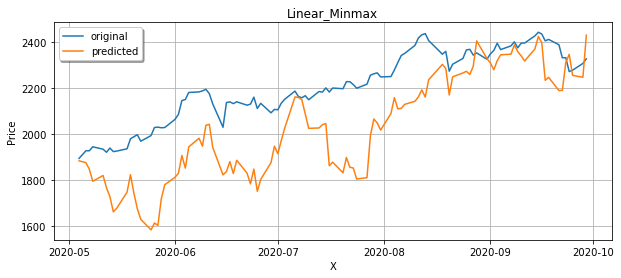

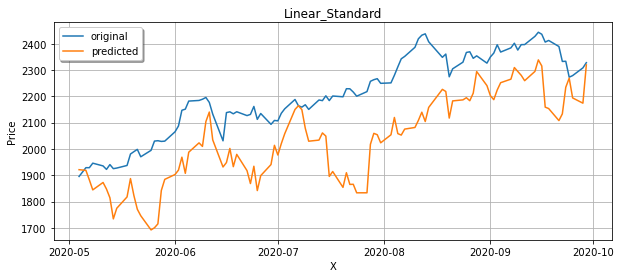

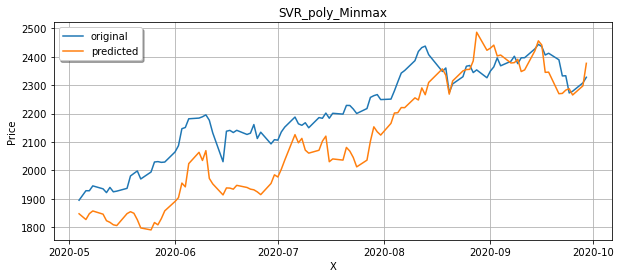

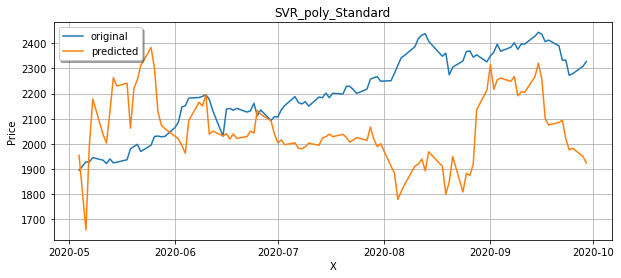

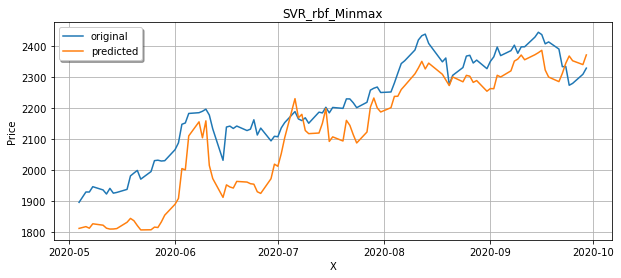

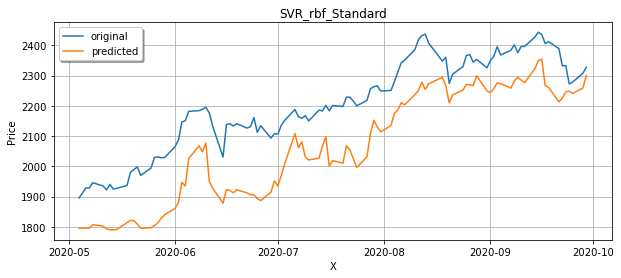

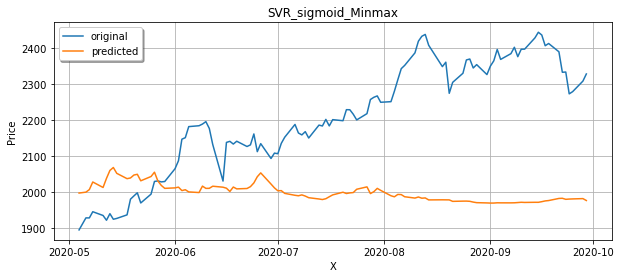

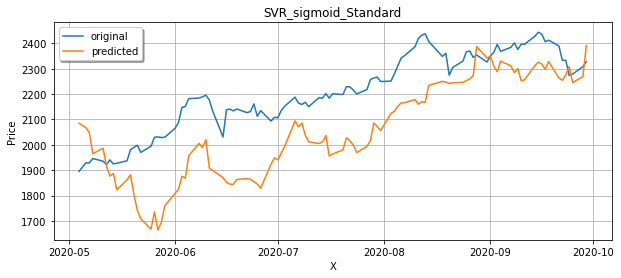

In [272]:
x_ax = kospi_test_merged.index
plt.figure(figsize=(10, 4))
sns.lineplot(x=x_ax, y=testy, label="original")
sns.lineplot(x=x_ax, y=pred, label="predicted")
plt.title("Linear_Minmax")
plt.xlabel('X')
plt.ylabel('Price')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()
plt.figure(figsize=(10, 4))
sns.lineplot(x=x_ax, y=testy, label="original")
sns.lineplot(x=x_ax, y=pred2, label="predicted")
plt.title("Linear_Standard")
plt.xlabel('X')
plt.ylabel('Price')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()
plt.figure(figsize=(10, 4))
sns.lineplot(x=x_ax, y=testy, label="original")
sns.lineplot(x=x_ax, y=pred3, label="predicted")
plt.title("SVR_poly_Minmax")
plt.xlabel('X')
plt.ylabel('Price')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()
plt.figure(figsize=(10, 4))
sns.lineplot(x=x_ax, y=testy, label="original")
sns.lineplot(x=x_ax, y=pred4, label="predicted")
plt.title("SVR_poly_Standard")
plt.xlabel('X')
plt.ylabel('Price')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()
plt.figure(figsize=(10, 4))
sns.lineplot(x=x_ax, y=testy, label="original")
sns.lineplot(x=x_ax, y=pred5, label="predicted")
plt.title("SVR_rbf_Minmax")
plt.xlabel('X')
plt.ylabel('Price')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()
plt.figure(figsize=(10, 4))
sns.lineplot(x=x_ax, y=testy, label="original")
sns.lineplot(x=x_ax, y=pred6, label="predicted")
plt.title("SVR_rbf_Standard")
plt.xlabel('X')
plt.ylabel('Price')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()
plt.figure(figsize=(10, 4))
sns.lineplot(x=x_ax, y=testy, label="original")
sns.lineplot(x=x_ax, y=pred7, label="predicted")
plt.title("SVR_sigmoid_Minmax")
plt.xlabel('X')
plt.ylabel('Price')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()
plt.figure(figsize=(10, 4))
sns.lineplot(x=x_ax, y=testy, label="original")
sns.lineplot(x=x_ax, y=pred8, label="predicted")
plt.title("SVR_sigmoid_Standard")
plt.xlabel('X')
plt.ylabel('Price')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()